In [81]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as spio
import random
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys
import random

In [82]:
mainpath = Path('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/byeast')
mainpath.resolve()

PosixPath('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/byeast')

In [83]:
# Find all dydata.mat files
path_mats = list( mainpath.glob('*/dydata.mat') )

# Initialize lifetimes and lengths arrays
tau = []
lens = []
lens_err = []
times = []
amps = []
amps_err = []
lens_mean = []
amps_mean = []

# Loop over all dynamic feature files
for pth in path_mats:
    # Load mat file
    mat_contents = spio.loadmat(pth, squeeze_me=True)

    assert( len(lens) == len(tau) )
    assert( len(lens) == len(lens_err) )
    assert( len(lens) == len(amps) )
    assert( len(lens) == len(amps_err) )
    assert( len(lens) == len(times) )
        
    # Concatenate data
    if type(mat_contents['tau']) == np.ndarray:

        for idx in np.arange( len( mat_contents['tau'])):
            tau.append( mat_contents['tau'][idx] )
            lens.append( mat_contents['lens'][idx])
            lens_err.append( mat_contents['lens_err'][idx])
            amps.append( mat_contents['amp'][idx] )
            amps_err.append( mat_contents['amp_err'][idx] )
            times.append( mat_contents['times'][idx] )
            lens_mean.append( np.mean( mat_contents['lens'][idx]))
            amps_mean.append( np.mean( mat_contents['amp'][idx]))
    else:
        tau.append( mat_contents['tau'] )
        lens.append( mat_contents['lens'])
        lens_err.append( mat_contents['lens_err'])
        amps.append( mat_contents['amp'] )
        amps_err.append( mat_contents['amp_err'] )
        times.append( mat_contents['times'] )
        lens_mean.append( np.mean( mat_contents['lens']))
        amps_mean.append( np.mean( mat_contents['amp']))
        
    assert( len(lens) == len(tau) )
    assert( len(lens) == len(lens_err) )
    assert( len(lens) == len(amps) )
    assert( len(lens) == len(amps_err) )
    assert( len(lens) == len(times) )

[Text(0, 0.5, 'length ($\\mu m$)'), (-0.1, 4.0)]

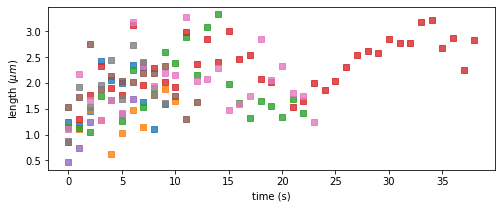

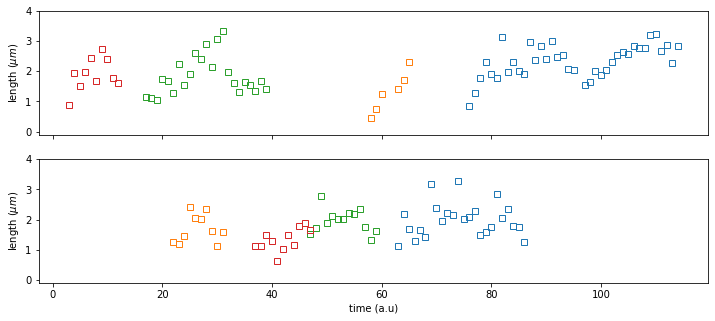

In [96]:
def get_len(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1

fig, ax = plt.subplots(figsize=(8,3))
lens = sorted( lens, key=get_len, reverse=True)
times = sorted( times, key=get_len, reverse=True)

for idx2 in random.sample( range( len(times)), k=8):
    ax.plot( times[idx2]-times[idx2][0], lens[idx2], 
                 ls='', marker='s', ms=6, alpha=0.8)
ax.set(xlabel = 'time (s)')
ax.set(ylabel = r'length ($\mu m$)')

fig, axs = plt.subplots(2,1,figsize=(12,5), sharex=True)
lens = sorted( lens, key=get_len, reverse=True)
times = sorted( times, key=get_len, reverse=True)

for idx2 in [0,7,2,5]:
    axs[0].plot( times[idx2], lens[idx2], 
                 ls='', marker='s', ms=6, linewidth=1,alpha=1.0, mfc='none')
for idx2 in [1,6,3,4]:
    axs[1].plot( times[idx2], lens[idx2], 
                 ls='', marker='s', ms=6, linewidth=1,alpha=1.0, mfc='none')
axs[1].set(xlabel = 'time (a.u)')
axs[0].set(ylabel = r'length ($\mu m$)', ylim=[-0.1, 4.0])
axs[1].set(ylabel = r'length ($\mu m$)', ylim=[-0.1, 4.0])

In [84]:
lens

[array([0.87554824, 1.92804466, 1.52731175, 1.9608575 , 2.44436262,
        1.69103823, 2.74489609, 2.40045455, 1.77293365, 1.61668173]),
 array([1.1461033 , 1.11878576, 1.05177283, 1.74216175, 1.67042014,
        1.26494066, 2.25147272, 1.53832518, 1.91143749, 2.59802986,
        2.39263517, 2.89925991, 2.15381369, 3.08488731, 3.33569894,
        1.98263247, 1.61885084, 1.31320452, 1.64571055, 1.56069989,
        1.34599196, 1.68957612, 1.42496025]),
 array([1.53331734, 1.72237515, 2.76516823, 1.87641234, 2.1262682 ,
        2.03316788, 2.01639367, 2.20309248, 2.18675149, 2.33310853,
        1.74090016, 1.30741612, 1.62567312]),
 array([0.46063841, 0.73382845, 1.23574711,        nan,        nan,
        1.39758434, 1.69842026, 2.31059521]),
 array([0.85447069, 1.29404522, 1.7650233 , 2.32299125, 1.89377932,
        1.7624832 , 3.12285421, 1.97072571, 2.29814225, 2.01187925,
        1.92058643, 2.98466462, 2.36624211, 2.84895741, 2.41470064,
        3.01397631, 2.46780822, 2.53764632, 